In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      images = []
      labels = []
      csv_f = csv.reader(training_file, quotechar = '|')
      next(csv_f) #Skip header
      for row in csv_f:
        labels.append(float(row[0]))
        pixels= list(map(float,row[1:785]))
        images.append(np.array_split(pixels,28))
      labels= np.array(labels)
      images= np.array(images)
    return images, labels


training_images, training_labels = get_data(r'C:\Users\Shaked Chen\Desktop\Deep-Learning-Explained-master\UjiIndoorLoc\sign_mnist_train.csv')
training_labels= tf.keras.utils.to_categorical(training_labels, dtype='float32')
    
testing_images, testing_labels = get_data(r'C:\Users\Shaked Chen\Desktop\Deep-Learning-Explained-master\UjiIndoorLoc\sign_mnist_test.csv')
testing_labels= tf.keras.utils.to_categorical(testing_labels, dtype='float32')
# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455, 25)
(7172, 28, 28)
(7172, 25)


In [3]:
#finding labels numbers ---->
print(training_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)


# Keep These
print(training_images[0].shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(28, 28, 1)
(7172, 28, 28, 1)


In [11]:
from tensorflow.keras import optimizers
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model =  tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.01),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

# Compile Model. 
opt= optimizers.SGD(lr=0.01,decay=1e-6)
model.compile(loss ='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels,batch_size=1),
                                                 validation_data=validation_datagen.flow(testing_images, testing_labels),
                                                 steps_per_epoch=1, epochs=30,verbose = 1)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1 steps, validate for 225 steps
Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 3.2971 - accuracy: 0.0000e+00 - val_loss: 3.2220 - val_accuracy: 0.0192
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 3.2447 - accuracy: 0.0000e+00 - val_loss: 3.2208 - val_accuracy: 0.0184
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 3.2956 - accuracy: 0.0000e+00 - val_loss: 3.2250 - val_accuracy: 0.0213
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 3.2807 - accuracy: 0.0000e+00 - val_loss: 3.2252 - val_accuracy: 0.0480
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 3.1361 - accuracy: 0.0000e+00 - val_loss: 3.2245 - val_accuracy: 0.0482
Epoch 6/30
1/1 [==============================] - 3s 3s/step - loss: 3.1626 - accuracy: 0.0000e+00 - val_loss: 3.2288 - val_accuracy: 0.0390
Epoch 7/30
1/1 [==============================] - 2s 2s/step -

[6.92426086682151, 0.56609035]

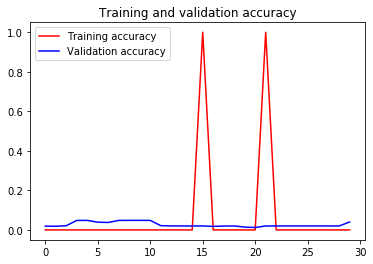

<Figure size 432x288 with 0 Axes>

In [12]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

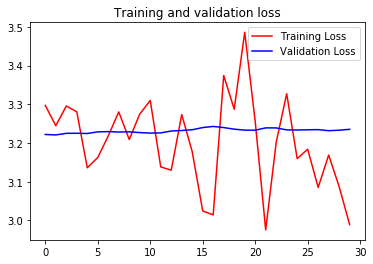

In [13]:

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
